In [89]:

import pandas as pd
import streamlit as st
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from matplotlib.ticker import FuncFormatter

2023-09-15 08:45:19.544 
  command:

    streamlit run C:\Users\CAleman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [2]:
df = pd.read_spss("BaseFinal.sav")

In [3]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['nt', 'dia', 'mes', 'ciudad', 'sexo', 'edad', 'edadan', 'EDADX', 'EDADG', 'p3', 'P3G', 'p4', 'P4G', 'p5', 'p6', 'P6X', 'p7', 'P7X', 'P7ME15', 'P7ME15X', 'p8', 'p9', 'p10', 'P10X', 'P10Y', 'p11', 'P11X', 'P11Y', 'P11Z', 'p12', 'p12a', 'p13a', 'p13b', 'P13', 'P13X', 'P13Y', 'p14', 'p10p15', 'p15', 'P15X', 'P15Y', 'p16', 'P16X', 'P16Y', 'P16Z', 'p17', 'p17a', 'p18a', 'p18b', 'P18', 'P18X', 'P18Y', 'p19a', 'p19b', 'P19', 'P19X', 'P19Y', 'p20a', 'p20b', 'p20c', 'p21', 'p15p22', 'p22', 'P22X', 'P22Y', 'p23', 'P23X', 'P23Y', 'P23Z', 'p24', 'p24a', 'p25', 'P25X', 'P25Y', 'p26', 'p27', 'P27X', 'P27Y', 'p28', 'p29a', 'p29b', 'p29c', 'p29d', 'p29e', 'p29f', 'P29AX', 'P29BX', 'P29CX', 'P29DX', 'P29EX', 'P29FX', 'P29SUM', 'P29SUMX', 'p30', 'P30WP', 'p30a', 'P30AX', 'P30AY', 'p31a', 'p31b', 'p31c', 'p31d', 'p31e', 'p31f', 'p31g', 'p31h', 'p31i', 'p31j', 'p31k', 'p31l', 'p31m', 'p31n', 'P31AY', 'P31BY', 'P31CY', 'P31DY', 'P31EY', 'P31FY', 'P31GY', 'P31HY', 'P31IY', 'P31JY', 'P31K

In [4]:
df['dependencia'] = df['p65'].astype(int)

In [5]:
def d(dependencia):
    if dependencia == 0:
        return 'Nadie'
    else:
        return 'tiene dependientes'

In [6]:
df['dependencia'] = df['dependencia'].apply(d)

In [7]:
df['dependencia']

0      tiene dependientes
1                   Nadie
2      tiene dependientes
3                   Nadie
4                   Nadie
              ...        
547    tiene dependientes
548                 Nadie
549                 Nadie
550    tiene dependientes
551    tiene dependientes
Name: dependencia, Length: 552, dtype: object

In [8]:
df['dependencia'] = df['dependencia'].apply(d)

In [9]:
df1 = df[['edad']]

In [10]:
dfn1 = df['p60a1']

In [11]:
df['p60a1'].dtypes

CategoricalDtype(categories=[  350.0,   500.0,   600.0,   640.0,   700.0,   800.0,
                    850.0,   900.0,  1000.0,  1100.0,
                  ...
                   8000.0,  8032.0,  8200.0,  8400.0,  8800.0,  9000.0,
                  10000.0, 10500.0, 12000.0, 'Ns/Nr'],
, ordered=False)

In [12]:
df['p67b']

0            Mes
1            Mes
2            Mes
3      Trimestre
4            NaN
         ...    
547          Mes
548     Quincena
549          Mes
550          Mes
551    Trimestre
Name: p67b, Length: 552, dtype: category
Categories (5, object): ['Mes', 'Quincena', 'Semana', 'Semestre', 'Trimestre']

In [13]:
df['p67b'] = df['p67b'].fillna('Mes')

In [14]:
def f(p67b):
    if p67b == 'Semana':
        return 4
    if p67b == 'Quincena':
        return 2
    if p67b == 'Mes':
        return 1
    if p67b == 'Trimestre':
        return 0.33 
    else:
        return 0.17

In [15]:
df['periodo'] = df['p67b'].apply(f)

In [16]:
df['periodo'] = df['periodo'].astype(int)

In [17]:
df['p67a'] = df['p67a'].astype(int)

In [18]:
df['mantenimiento'] = df['p67a'] * df['periodo']

In [19]:
df['p66a'] = df['p66a'].astype(int)

In [20]:
df['p66b'] = df['p66b'].astype(int)

In [21]:
df['gastos'] = df['mantenimiento'] + df['p66a'] + df['p66b']

In [22]:
def x(p60a1):
    if p60a1 == 'Ns/Nr':
        return 2000
    else:
        return p60a1

In [23]:
df['ingresom'] = df['p60a1'].apply(x)

In [24]:
df['ingresor'] = df['ingresom'] - df['gastos']

In [25]:
df['categoria'] = df['ingresor'].apply(lambda x: 'minimo' if x < 2370 else 'medio' if x < 4740 else 'alto')

In [26]:
df['categoria'].value_counts()

minimo    238
medio     218
alto       96
Name: categoria, dtype: int64

In [27]:
def years_of_study(p4):
    if p4 == 'Ninguno' or p4 == 'Primaria completa' or p4 == 'Secundaria incompleta' or p4 == 'Secundaria completa':
        return 'Secundario'
    else:
        return 'Alto'

In [28]:
df['years of study'] = df['p4'].apply(years_of_study)

In [29]:
df.rename(columns={'years of study':'educacion'}, inplace=True)

In [30]:
df['educacion'].value_counts()

Alto          365
Secundario    187
Name: educacion, dtype: int64

In [31]:
def jefe(p8):
    if p8 == 'Jefe o jefa del hogar':
        return 'jefe'
    else:
        return 'no jefe'

In [32]:
df['jefe'] = df['p8'].apply(jefe)

In [33]:
df['jefe'].value_counts()

no jefe    282
jefe       270
Name: jefe, dtype: int64

In [34]:
df['anterior'] = df['p12']

In [35]:
def asalariado(anterior):
    if anterior ==  'Empleado' or anterior == 'Obrero' or anterior == 'Profesional independiente/ Consultor':
        return 'asalariado'
    else:
        return 'no asalariado'

In [36]:
df['anterior'] = df['anterior'].apply(asalariado)

In [37]:
df['anterior'].value_counts()

asalariado       463
no asalariado     66
Name: anterior, dtype: int64

In [38]:
df['antiguedad'] = df['p27']

In [39]:
def anti(antiguedad):
    if antiguedad <=  12:
        return 1
    if antiguedad <= 24:
        return 2
    if antiguedad <= 33:
        return 3
    else:
        return 4

In [40]:
df['antiguedad'] = df['antiguedad'].apply(anti)

In [41]:
df['antiguedad'].value_counts()

1    198
2    175
4    107
3     72
Name: antiguedad, dtype: int64

In [42]:
df['pluriactividad'] = df['p21']

In [43]:
def m(pluriactividad):
    if pluriactividad == 'Solo trabaja como delivery':
        return 'Solo trabaja como delivery'
    else:
        return 'Alterna con otro trabajo y/o estudios'

In [44]:
df['pluriactividad'] = df['pluriactividad'].apply(m)

In [45]:
df['razones'] = df['p14']

In [46]:
df['razones']

0                     Razones económicas/ bajos ingresos
1                La empresa, negocio, actividad se cerró
2      Características del trabajo (aburrido, malos h...
3                                          Fue despedido
4      Características del trabajo (aburrido, malos h...
                             ...                        
547              La empresa, negocio, actividad se cerró
548                                        Fue despedido
549                                   Razones personales
550                                        Fue despedido
551                                                  NaN
Name: razones, Length: 552, dtype: category
Categories (11, object): ['Cambiaron las políticas de la empresa', 'Características del trabajo (aburrido, malos ..., 'Era un empleo temporal', 'Fue despedido', ..., 'Por falta de capital o de clientes', 'Razones económicas/ bajos ingresos', 'Razones personales', 'Sigue realizando el mismo trabajo']

In [47]:
def z(razones):
    if razones == 'Era un empleo temporal':
        return 'Era un empleo temporal'
    if razones == 'Fue despedido' or razones == 'La empresa, negocio, actividad se cerró' or razones == 'Por falta de capital o de clientes' or razones =='Fue obligado a renunciar':
        return 'Razones de la demanda'
    if razones == 'Razones personales':
        return 'Razones personales'
    if razones == 'Razones económicas/ bajos ingresos':
        return 'Razones económicas/ bajos ingresos'
    else:
        return 'Renuncio'

In [48]:
df['razones'] = df['razones'].apply(z)

In [49]:
df['p7']

C:\Users\CAleman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0      0.0
1      0.0
2      2.0
3      0.0
4      0.0
      ... 
547    0.0
548    NaN
549    NaN
550    0.0
551    1.0
Name: p7, Length: 552, dtype: category
Categories (8, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [50]:
df['p7'] = df['p7'].fillna(0)

In [51]:
df['menores'] = df['p7'].astype(int)

In [52]:
df['menores'].value_counts()

0    275
1    155
2     78
3     30
4      9
5      3
6      1
7      1
Name: menores, dtype: int64

In [53]:
def t(menores):
    if menores == 0:
        return 'ninguno'
    else:
        return 'menores en el hogar'

In [54]:
df['menores'] = df['menores'].apply(t)

In [55]:
df2 = df[['edad', 'razones','pluriactividad', 'antiguedad', 'ingresor', 'categoria', 'educacion', 'jefe','anterior','menores','dependencia']]

In [56]:
df2

,edad,razones,pluriactividad,antiguedad,ingresor,categoria,educacion,jefe,anterior,menores,dependencia
0,22.0,Razones económicas/ bajos ingresos,Alterna con otro trabajo y/o estudios,1,1517.0,minimo,Alto,jefe,asalariado,ninguno,tiene dependientes
1,25.0,Razones de la demanda,Alterna con otro trabajo y/o estudios,4,4100.0,medio,Alto,no jefe,asalariado,ninguno,tiene dependientes
2,24.0,Renuncio,Solo trabaja como delivery,3,3890.0,medio,Secundario,jefe,asalariado,menores en el hogar,tiene dependientes
3,27.0,Razones de la demanda,Alterna con otro trabajo y/o estudios,3,3300.0,medio,Alto,no jefe,asalariado,ninguno,tiene dependientes
4,27.0,Renuncio,Alterna con otro trabajo y/o estudios,4,3750.0,medio,Alto,no jefe,asalariado,ninguno,tiene dependientes
...,...,...,...,...,...,...,...,...,...,...,...
547,28.0,Razones de la demanda,Alterna con otro trabajo y/o estudios,4,2095.0,minimo,Alto,jefe,asalariado,ninguno,tiene dependientes
548,22.0,Razones de la demanda,Solo trabaja como delivery,1,1740.0,minimo,Secundario,jefe,asalariado,ninguno,tiene dependientes
549,20.0,Razones personales,Alterna con otro trabajo y/o estudios,2,1765.0,minimo,Alto,jefe,asalariado,ninguno,tiene dependientes
550,37.0,Razones de la demanda,Solo trabaja como delivery,1,3338.0,medio,Alto,jefe,asalariado,ninguno,tiene dependientes


In [57]:
df2['edad'] = df2['edad'].astype(int)

C:\Users\CAleman\AppData\Local\Temp\ipykernel_11996\806111492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['edad'] = df2['edad'].astype(int)


In [58]:
df2['edad'].dtypes

dtype('int32')

In [59]:
df2_e = df2[df2['edad'].between(18, 24)]
df2_e1 = df2[df2['edad'].between(25,29)]
df2_ee = df2[df2['edad'] > 29]

In [60]:
df2_e['edad'].value_counts()

22    47
23    44
24    40
21    24
20    19
19    13
18     5
Name: edad, dtype: int64

In [61]:
df2_e1['edad'].value_counts()

26    52
28    44
27    41
25    37
29    37
Name: edad, dtype: int64

In [62]:
df2_ee['edad'].value_counts()

30    29
32    20
33    17
31    16
35    15
34    15
37     8
36     8
40     3
38     3
44     3
50     2
43     2
46     2
41     2
42     1
45     1
47     1
39     1
Name: edad, dtype: int64

In [63]:
df2_e

,edad,razones,pluriactividad,antiguedad,ingresor,categoria,educacion,jefe,anterior,menores,dependencia
0,22,Razones económicas/ bajos ingresos,Alterna con otro trabajo y/o estudios,1,1517.0,minimo,Alto,jefe,asalariado,ninguno,tiene dependientes
2,24,Renuncio,Solo trabaja como delivery,3,3890.0,medio,Secundario,jefe,asalariado,menores en el hogar,tiene dependientes
10,23,Razones personales,Alterna con otro trabajo y/o estudios,3,2810.0,medio,Alto,no jefe,asalariado,menores en el hogar,tiene dependientes
12,23,Razones económicas/ bajos ingresos,Alterna con otro trabajo y/o estudios,2,2305.0,minimo,Alto,no jefe,asalariado,menores en el hogar,tiene dependientes
13,20,Razones económicas/ bajos ingresos,Solo trabaja como delivery,1,4735.0,medio,Alto,no jefe,asalariado,menores en el hogar,tiene dependientes
...,...,...,...,...,...,...,...,...,...,...,...
540,24,Razones económicas/ bajos ingresos,Solo trabaja como delivery,1,2400.0,medio,Secundario,jefe,asalariado,ninguno,tiene dependientes
541,24,Razones personales,Solo trabaja como delivery,4,7074.0,alto,Alto,jefe,asalariado,ninguno,tiene dependientes
543,23,Razones personales,Solo trabaja como delivery,2,2220.0,minimo,Alto,jefe,asalariado,ninguno,tiene dependientes
548,22,Razones de la demanda,Solo trabaja como delivery,1,1740.0,minimo,Secundario,jefe,asalariado,ninguno,tiene dependientes


In [64]:
df2_ee

,edad,razones,pluriactividad,antiguedad,ingresor,categoria,educacion,jefe,anterior,menores,dependencia
6,32,Razones personales,Alterna con otro trabajo y/o estudios,1,2165.0,minimo,Secundario,no jefe,asalariado,ninguno,tiene dependientes
16,37,Razones de la demanda,Alterna con otro trabajo y/o estudios,3,2250.0,minimo,Alto,jefe,asalariado,menores en el hogar,tiene dependientes
17,31,Razones de la demanda,Solo trabaja como delivery,4,5835.0,alto,Alto,jefe,asalariado,ninguno,tiene dependientes
23,33,Razones personales,Alterna con otro trabajo y/o estudios,2,1700.0,minimo,Alto,no jefe,asalariado,ninguno,tiene dependientes
32,33,Razones de la demanda,Solo trabaja como delivery,1,3117.0,medio,Alto,jefe,asalariado,ninguno,tiene dependientes
...,...,...,...,...,...,...,...,...,...,...,...
539,36,Razones de la demanda,Solo trabaja como delivery,1,5030.0,alto,Alto,no jefe,asalariado,ninguno,tiene dependientes
542,31,Razones de la demanda,Alterna con otro trabajo y/o estudios,4,2884.0,medio,Secundario,jefe,asalariado,menores en el hogar,tiene dependientes
546,30,Razones económicas/ bajos ingresos,Solo trabaja como delivery,1,3190.0,medio,Secundario,jefe,no asalariado,ninguno,tiene dependientes
550,37,Razones de la demanda,Solo trabaja como delivery,1,3338.0,medio,Alto,jefe,asalariado,ninguno,tiene dependientes


In [65]:
pd.crosstab(df2.educacion, df2.categoria)

categoria,alto,medio,minimo
educacion,,,
Alto,54,150,161
Secundario,42,68,77


In [66]:
pd.crosstab(df2.educacion, df2.pluriactividad)

pluriactividad,Alterna con otro trabajo y/o estudios,Solo trabaja como delivery
educacion,,
Alto,258,107
Secundario,70,117


In [67]:
pd.crosstab(df2.educacion, df2.razones)

razones,Era un empleo temporal,Razones de la demanda,Razones económicas/ bajos ingresos,Razones personales,Renuncio
educacion,,,,,
Alto,30,94,71,104,48
Secundario,17,48,51,40,26


In [68]:
pd.crosstab(df2.educacion, df2.antiguedad)

antiguedad,1,2,3,4
educacion,,,,
Alto,129,118,49,69
Secundario,69,57,23,38


In [69]:
pd.crosstab(df2.educacion, df2.jefe)

jefe,jefe,no jefe
educacion,,
Alto,169,196
Secundario,101,86


In [70]:
pd.crosstab(df2.educacion, df2.anterior)

anterior,asalariado,no asalariado
educacion,,
Alto,307,40
Secundario,156,26


In [71]:
pd.crosstab(df2.jefe, df2.categoria)

categoria,alto,medio,minimo
jefe,,,
jefe,58,114,98
no jefe,38,104,140


In [72]:
pd.crosstab(df2.jefe, df2.pluriactividad)

pluriactividad,Alterna con otro trabajo y/o estudios,Solo trabaja como delivery
jefe,,
jefe,132,138
no jefe,196,86


In [73]:
pd.crosstab(df2.jefe, df2.razones)

razones,Era un empleo temporal,Razones de la demanda,Razones económicas/ bajos ingresos,Razones personales,Renuncio
jefe,,,,,
jefe,26,80,59,62,38
no jefe,21,62,63,82,36


In [74]:
pd.crosstab(df2.jefe, df2.antiguedad)

antiguedad,1,2,3,4
jefe,,,,
jefe,91,77,32,70
no jefe,107,98,40,37


In [75]:
pd.crosstab(df2.jefe, df2.educacion)

educacion,Alto,Secundario
jefe,,
jefe,169,101
no jefe,196,86


In [76]:
pd.crosstab(df2.jefe, df2.anterior)

anterior,asalariado,no asalariado
jefe,,
jefe,236,29
no jefe,227,37


In [77]:
pd.crosstab(df2.anterior, df2.categoria)

categoria,alto,medio,minimo
anterior,,,
asalariado,71,192,200
no asalariado,19,19,28


In [78]:
pd.crosstab(df2.anterior, df2.pluriactividad)

pluriactividad,Alterna con otro trabajo y/o estudios,Solo trabaja como delivery
anterior,,
asalariado,272,191
no asalariado,39,27


In [79]:
pd.crosstab(df2.anterior, df2.razones)

razones,Era un empleo temporal,Razones de la demanda,Razones económicas/ bajos ingresos,Razones personales,Renuncio
anterior,,,,,
asalariado,44,109,111,132,67
no asalariado,3,33,11,12,7


In [80]:
pd.crosstab(df2.anterior, df2.antiguedad)

antiguedad,1,2,3,4
anterior,,,,
asalariado,162,155,61,85
no asalariado,28,14,9,15


In [81]:
pd.crosstab(df2.anterior, df2.educacion)

educacion,Alto,Secundario
anterior,,
asalariado,307,156
no asalariado,40,26


In [82]:
pd.crosstab(df2.anterior, df2.jefe)

jefe,jefe,no jefe
anterior,,
asalariado,236,227
no asalariado,29,37


In [83]:
def a(edad):
    if edad == 18 or edad == 19 or edad == 20 or edad == 21 or edad == 22 or edad == 23 or edad == 24 or edad == 25 or edad == 26 or edad == 27 or edad == 28 or edad == 29:
        return 'edad entre 18-29'
    else:
        return 'mayores de 30'

In [85]:
df2['edad'] = df2['edad'].apply(a)

C:\Users\CAleman\AppData\Local\Temp\ipykernel_11996\1001020082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['edad'] = df2['edad'].apply(a)


In [86]:
pd.crosstab(df2.edad, df2.categoria)

categoria,alto,medio,minimo
edad,,,
edad entre 18-29,64,161,178
mayores de 30,32,57,60


In [87]:
pd.crosstab(df2.edad, df2.pluriactividad)

pluriactividad,Alterna con otro trabajo y/o estudios,Solo trabaja como delivery
edad,,
edad entre 18-29,250,153
mayores de 30,78,71


In [88]:
pd.crosstab(df2.edad, df2.razones)

razones,Era un empleo temporal,Razones de la demanda,Razones económicas/ bajos ingresos,Razones personales,Renuncio
edad,,,,,
edad entre 18-29,34,80,100,112,55
mayores de 30,13,62,22,32,19


In [ ]:
pd.crosstab(df2.edad, df2.antiguedad)

In [ ]:
pd.crosstab(df2.edad, df2.educacion)

In [ ]:
pd.crosstab(df2.edad, df2.jefe)

In [ ]:
pd.crosstab(df2.edad, df2.anterior)

In [ ]:
pd.crosstab(df2.anterior, df2.edad)

In [ ]:
pd.crosstab(df2.educacion, df2.edad)

In [ ]:
pd.crosstab(df2.jefe, df2.edad)

In [ ]:
df2

In [ ]:
pd.crosstab(df2.edad, df2.categoria)

In [ ]:
pd.crosstab(df2.edad, df2.pluriactividad)

In [ ]:
pd.crosstab(df2.edad, df2.razones)

In [ ]:
pd.crosstab(df2.edad, df2.antiguedad)

In [ ]:
pd.crosstab(df2.edad, df2.educacion)

In [ ]:
pd.crosstab(df2.edad, df2.jefe)

In [ ]:
pd.crosstab(df2.edad, df2.anterior)

In [ ]:
pd.crosstab(df2.anterior, df2.edad)

In [ ]:
pd.crosstab(df2.educacion, df2.edad)

In [ ]:
pd.crosstab(df2.jefe, df2.edad)

In [ ]:
pd.crosstab(df2.menores, df2.categoria)

In [ ]:
pd.crosstab(df2.menores, df2.pluriactividad)

In [ ]:
pd.crosstab(df2.menores, df2.anterior)

In [ ]:
pd.crosstab(df2.menores, df2.educacion)

In [ ]:
pd.crosstab(df2.menores, df2.jefe)

In [ ]:
pd.crosstab(df2.menores, df2.razones)

In [ ]:
pd.crosstab(df2.menores, df2.edad)

In [ ]:
pd.crosstab(df2.menores, df2.antiguedad)

In [ ]:
pd.crosstab(df2.dependencia, df2.categoria)

In [ ]:
pd.crosstab(df2.dependencia, df2.edad)

In [ ]:
pd.crosstab(df2.dependencia, df2.categoria)

In [ ]:
pd.crosstab(df2.dependencia, df2.pluriactividad)

In [ ]:
pd.crosstab(df2.dependencia, df2.anterior)

In [ ]:
pd.crosstab(df2.dependencia, df2.antiguedad)

In [ ]:
pd.crosstab(df2.dependencia, df2.educacion)

In [ ]:
pd.crosstab(df2.dependencia, df2.jefe)

In [ ]:
pd.crosstab(df2.dependencia, df2.razones)

In [ ]:
df["p12"]

0      Empleado
1      Empleado
2        Obrero
3      Empleado
4      Empleado
         ...   
547    Empleado
548    Empleado
549      Obrero
550    Empleado
551         NaN
Name: p12, Length: 552, dtype: category
Categories (6, object): ['Dueño, socio o empleador', 'Empleado', 'Obrero', 'Profesional independiente/ Consultor', 'Trabajador por cuenta propia (independiente)', 'Trabajador/ familiar/ aprendiz sin remuneración']

In [ ]:
df['p12']=df['p12'].cat.add_categories('Primertrabajo').fillna('Primertrabajo')
df['p12']

0           Empleado
1           Empleado
2             Obrero
3           Empleado
4           Empleado
           ...      
547         Empleado
548         Empleado
549           Obrero
550         Empleado
551    Primertrabajo
Name: p12, Length: 552, dtype: category
Categories (7, object): ['Dueño, socio o empleador', 'Empleado', 'Obrero', 'Profesional independiente/ Consultor', 'Trabajador por cuenta propia (independiente)', 'Trabajador/ familiar/ aprendiz sin remuneración', 'Primertrabajo']

In [ ]:
df['PrimeroTrabajo']=df['p12']

In [ ]:
df['PrimeroTrabajo']

0           Empleado
1           Empleado
2             Obrero
3           Empleado
4           Empleado
           ...      
547         Empleado
548         Empleado
549           Obrero
550         Empleado
551    Primertrabajo
Name: PrimeroTrabajo, Length: 552, dtype: category
Categories (7, object): ['Dueño, socio o empleador', 'Empleado', 'Obrero', 'Profesional independiente/ Consultor', 'Trabajador por cuenta propia (independiente)', 'Trabajador/ familiar/ aprendiz sin remuneración', 'Primertrabajo']

In [ ]:
df['PrimeroTrabajo'].value_counts()

Empleado                                           388
Obrero                                              74
Trabajador por cuenta propia (independiente)        47
Primertrabajo                                       23
Dueño, socio o empleador                            12
Trabajador/ familiar/ aprendiz sin remuneración      7
Profesional independiente/ Consultor                 1
Name: PrimeroTrabajo, dtype: int64

In [ ]:
def a(PrimeroTrabajo):
    if PrimeroTrabajo == 'Primertrabajo':
        return 'Primer trabajo'
    else:
        return'Tenia Trabajo'

In [ ]:
df['PrimeroTrabajo'] = df['PrimeroTrabajo'].apply(a)

In [ ]:
df['PrimeroTrabajo']

0       Tenia Trabajo
1       Tenia Trabajo
2       Tenia Trabajo
3       Tenia Trabajo
4       Tenia Trabajo
            ...      
547     Tenia Trabajo
548     Tenia Trabajo
549     Tenia Trabajo
550     Tenia Trabajo
551    Primer trabajo
Name: PrimeroTrabajo, Length: 552, dtype: object

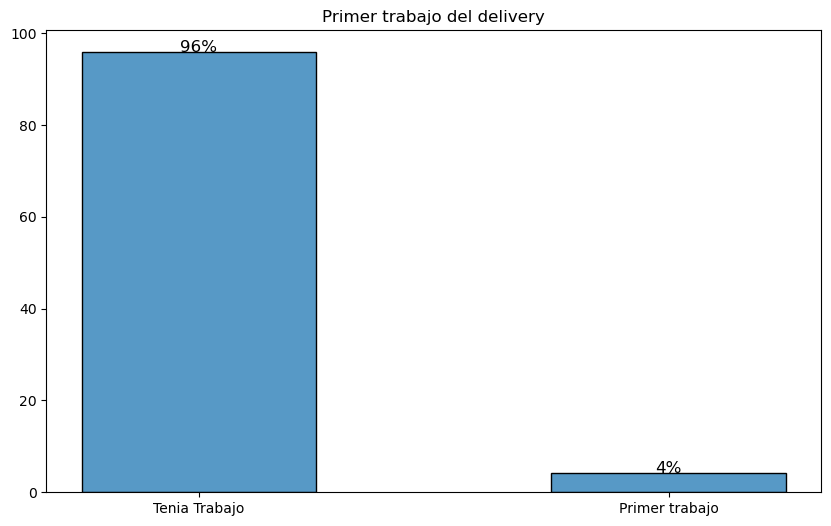

In [ ]:

plt.figure(figsize=(10, 6))
lista_con_elementos = ['96%', '4%']
ax = sns.histplot(data=df, x='PrimeroTrabajo', shrink=0.5, stat="percent")

plt.title('Primer trabajo del delivery')
plt.xlabel("")
plt.ylabel("")
for i in range(len(lista_con_elementos)):
    plt.annotate(
        text=lista_con_elementos[i],
        xy=(i, ax.patches[i].get_height()),  
        xycoords='data',
        fontsize=12,
        ha='center', 
    
    )

plt.show()



In [ ]:
df2

,edad,razones,pluriactividad,antiguedad,ingresor,categoria,educacion,jefe,anterior,menores,dependencia
0,22,Razones económicas/ bajos ingresos,Alterna con otro trabajo y/o estudios,1,1517.0,minimo,Alto,jefe,asalariado,ninguno,Hasta dos
1,25,Razones de la demanda,Alterna con otro trabajo y/o estudios,4,4100.0,medio,Alto,no jefe,asalariado,ninguno,Nadie
2,24,Renuncio,Solo trabaja como delivery,3,3890.0,medio,Secundario,jefe,asalariado,menores en el hogar,Mas de dos
3,27,Razones de la demanda,Alterna con otro trabajo y/o estudios,3,3300.0,medio,Alto,no jefe,asalariado,ninguno,Nadie
4,27,Renuncio,Alterna con otro trabajo y/o estudios,4,3750.0,medio,Alto,no jefe,asalariado,ninguno,Nadie
...,...,...,...,...,...,...,...,...,...,...,...
547,28,Razones de la demanda,Alterna con otro trabajo y/o estudios,4,2095.0,minimo,Alto,jefe,asalariado,ninguno,Hasta dos
548,22,Razones de la demanda,Solo trabaja como delivery,1,1740.0,minimo,Secundario,NaN,asalariado,ninguno,Nadie
549,20,Razones personales,Alterna con otro trabajo y/o estudios,2,1765.0,minimo,Alto,NaN,asalariado,ninguno,Nadie
550,37,Razones de la demanda,Solo trabaja como delivery,1,3338.0,medio,Alto,jefe,asalariado,ninguno,Hasta dos


In [ ]:
dff = df[['PrimeroTrabajo','anterior']]

In [ ]:
dff

,PrimeroTrabajo,anterior
0,Tenia Trabajo,asalariado
1,Tenia Trabajo,asalariado
2,Tenia Trabajo,asalariado
3,Tenia Trabajo,asalariado
4,Tenia Trabajo,asalariado
...,...,...
547,Tenia Trabajo,asalariado
548,Tenia Trabajo,asalariado
549,Tenia Trabajo,asalariado
550,Tenia Trabajo,asalariado


In [ ]:
dff=dff.dropna()
dff

,PrimeroTrabajo,anterior
0,Tenia Trabajo,asalariado
1,Tenia Trabajo,asalariado
2,Tenia Trabajo,asalariado
3,Tenia Trabajo,asalariado
4,Tenia Trabajo,asalariado
...,...,...
546,Tenia Trabajo,no asalariado
547,Tenia Trabajo,asalariado
548,Tenia Trabajo,asalariado
549,Tenia Trabajo,asalariado


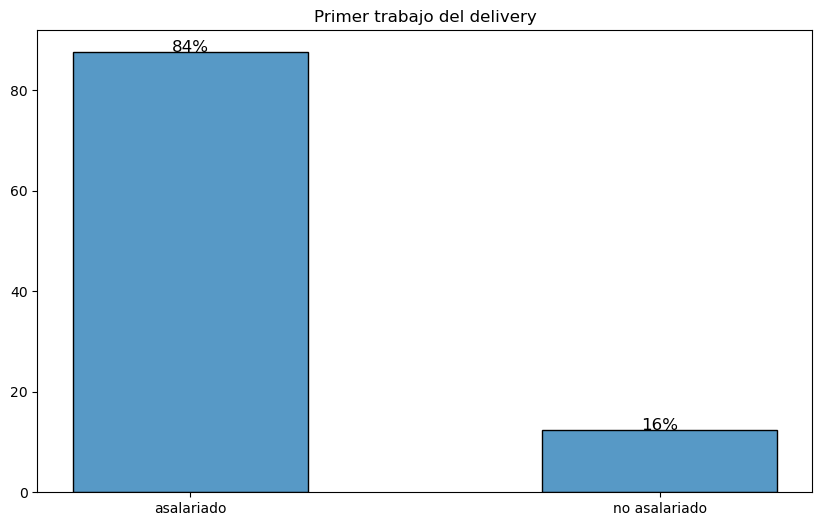

In [ ]:
plt.figure(figsize=(10, 6))
lista_con_elementos = ['84%', '16%']
ax = sns.histplot(data=df, x='anterior',stat="percent",shrink=0.5)

plt.title('Primer trabajo del delivery')
plt.xlabel("")
plt.ylabel("")
for i in range(len(lista_con_elementos)):
    plt.annotate(
        text=lista_con_elementos[i],
        xy=(i, ax.patches[i].get_height()),  
        xycoords='data',
        fontsize=12,
        ha='center', 
    
    )

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
lista_con_elementos = ['84%', '16%']
ax = sns.histplot(data=df, x='anterior',stat="percent",shrink=0.5)

plt.title('Primer trabajo del delivery')
plt.xlabel("")
plt.ylabel("")

In [ ]:
df2[['educacion']]

,educacion
0,Alto
1,Alto
2,Secundario
3,Alto
4,Alto
...,...
547,Alto
548,Secundario
549,Alto
550,Alto


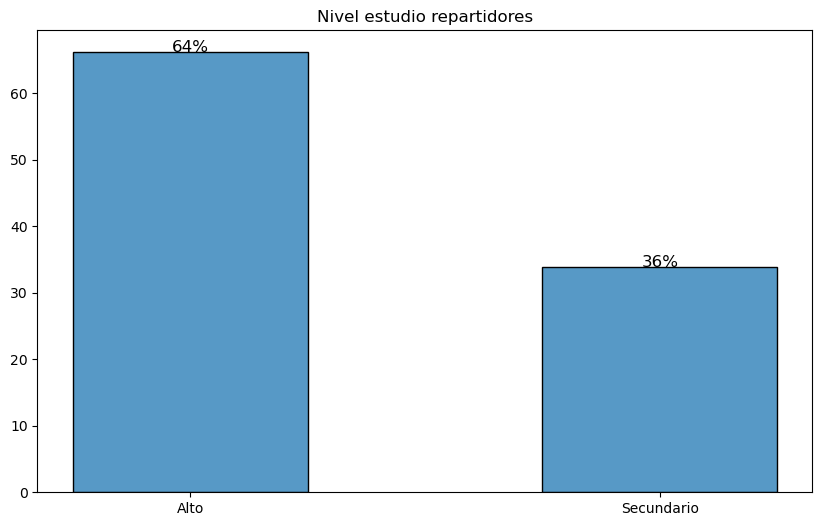

In [ ]:
plt.figure(figsize=(10, 6))
lista_con_elementos = ['64%', '36%']
ax = sns.histplot(data=df, x='educacion',stat="percent",shrink=0.5)

plt.title('Nivel estudio repartidores')
plt.xlabel("")
plt.ylabel("")
for i in range(len(lista_con_elementos)):
    plt.annotate(
        text=lista_con_elementos[i],
        xy=(i, ax.patches[i].get_height()),  
        xycoords='data',
        fontsize=12,
        ha='center', 
    
    )

plt.show()

In [ ]:
df2[['dependencia','pluriactividad']]

,dependencia,pluriactividad
0,tiene dependientes,Alterna con otro trabajo y/o estudios
1,Nadie,Alterna con otro trabajo y/o estudios
2,tiene dependientes,Solo trabaja como delivery
3,Nadie,Alterna con otro trabajo y/o estudios
4,Nadie,Alterna con otro trabajo y/o estudios
...,...,...
547,tiene dependientes,Alterna con otro trabajo y/o estudios
548,Nadie,Solo trabaja como delivery
549,Nadie,Alterna con otro trabajo y/o estudios
550,tiene dependientes,Solo trabaja como delivery


In [ ]:
df2['dependencia'].value_counts()

tiene dependientes    338
Nadie                 214
Name: dependencia, dtype: int64

In [ ]:
def j(dependencia):
    if dependencia == 'Nadie':
        return 'Nadie'
    else:
        return np.nan


In [ ]:
df2['dependencia'] = df2['dependencia'].apply(j)

C:\Users\CAleman\AppData\Local\Temp\ipykernel_12848\4003668377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dependencia'] = df2['dependencia'].apply(j)


In [ ]:
df2['dependencia']

0        NaN
1      Nadie
2        NaN
3      Nadie
4      Nadie
       ...  
547      NaN
548    Nadie
549    Nadie
550      NaN
551      NaN
Name: dependencia, Length: 552, dtype: object

In [ ]:
df3=df2[['dependencia','pluriactividad']]
df3

df3.value_counts()

dependencia  pluriactividad                       
Nadie        Alterna con otro trabajo y/o estudios    151
             Solo trabaja como delivery                63
dtype: int64

In [ ]:
df3.dropna(inplace=True)

C:\Users\CAleman\AppData\Local\Temp\ipykernel_12848\1665326329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


In [ ]:

df3.value_counts()

dependencia  pluriactividad                       
Nadie        Alterna con otro trabajo y/o estudios    151
             Solo trabaja como delivery                63
dtype: int64

In [ ]:
mising = df3.isnull().sum()

In [ ]:
print(mising)

dependencia       0
pluriactividad    0
dtype: int64


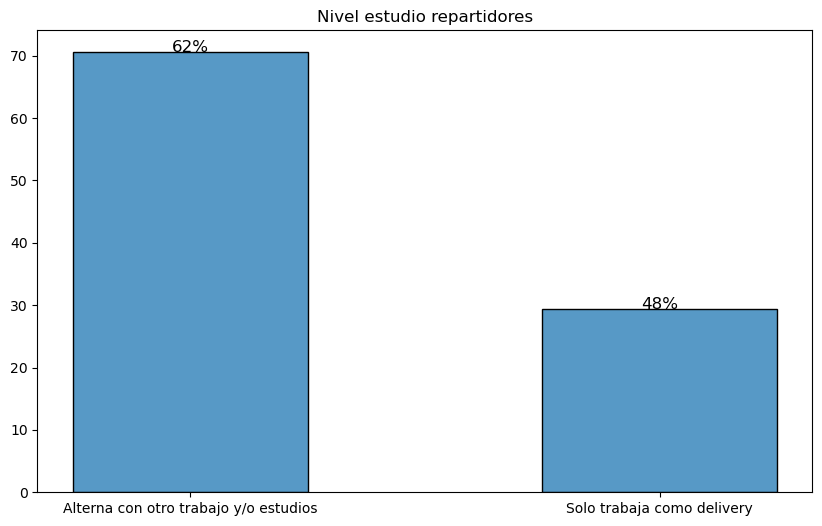

In [ ]:
plt.figure(figsize=(10, 6))
lista_con_elementos = ['62%', '48%']
ax = sns.histplot(data=df3, x='pluriactividad',stat="percent",shrink=0.5)

plt.title('Nivel estudio repartidores')
plt.xlabel("")
plt.ylabel("")
for i in range(len(lista_con_elementos)):
    plt.annotate(
        text=lista_con_elementos[i],
        xy=(i, ax.patches[i].get_height()),  
        xycoords='data',
        fontsize=12,
        ha='center', 
    
    )

plt.show()

In [ ]:

df3.value_counts()

dependencia  pluriactividad                       
Nadie        Alterna con otro trabajo y/o estudios    151
             Solo trabaja como delivery                63
dtype: int64